<a href="https://colab.research.google.com/github/josephxlp/PyTorch100Days/blob/main/W2DAY14_CNN_on_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W2DAY14: CNN on CIFAR-10

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

In [ ]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

In [ ]:
train_ds = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_ds = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

In [ ]:
train_dl = DataLoader(train_ds,batch_size=64, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=64*10, shuffle=False)

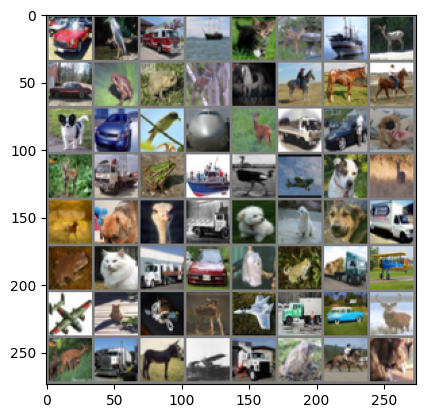

automobile bird  truck ship  cat   deer  ship  deer  automobile frog  frog  bird  horse horse horse horse dog   automobile bird  airplane deer  truck automobile dog   deer  truck frog  ship  bird  airplane dog   deer  deer  dog   bird  truck dog   dog   dog   truck frog  cat   truck automobile dog   frog  truck airplane airplane cat   cat   deer  airplane truck automobile deer  deer  truck horse airplane truck frog  horse cat  


In [ ]:
# prompt: plot a batch from the train
batch_size = 64
classes = train_ds.classes
import matplotlib.pyplot as plt
import numpy as np
import torchvision
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(train_dl)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
class CIFAR10CNN(nn.Module):
    def __init__(self):
        super(CIFAR10CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32,64, 2, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
         x = self.pool(F.relu(self.conv1(x)))
         x = self.pool(F.relu(self.conv2(x)))
         x = x.view(-1, 64 * 8* 8)
         x = F.relu(self.fc1(x))
         return self.fc2(x)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
model = CIFAR10CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
for epoch in range(10):
    if epoch > 1: break
    model.train()
    for images, labels in tqdm(train_dl, total=len(train_dl)):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch+1}, Loss: {loss.item()}')

# Evaluation
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_dl:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


100%|██████████| 782/782 [01:23<00:00,  9.34it/s]


Epoch: 1, Loss: 1.221958041191101



100%|██████████| 782/782 [01:27<00:00,  8.92it/s]

Epoch: 2, Loss: 0.7359100580215454
